# What's in a Name?

In [1]:
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

ModuleNotFoundError: No module named 'nbinteract'

In [ ]:
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [3]:
import pandas as pd

students = (pd.read_csv('names.csv', header=0,
                        names=['timestamp', 'name', 'sex', 'age'])
            .assign(name=lambda df: df['name'].str.lower())
            .replace({'Male': 'M', 'Female': 'F'}))
students

,timestamp,name,sex,age
0,1/25/2020 21:09:45,samuel,M,24.0
1,1/26/2020 10:16:54,matt,M,23.0
2,1/29/2020 12:07:44,joshua,M,23.0
3,1/29/2020 12:07:46,lauryn,F,20.0
4,1/29/2020 12:07:48,alexis,F,20.0
5,1/29/2020 12:07:49,adrian,M,23.0
6,1/29/2020 12:07:49,jess,F,21.0
7,1/29/2020 12:07:51,shannon,F,22.0
8,1/29/2020 12:07:52,cole,M,22.0
9,1/29/2020 12:07:54,krystyna,F,20.0


In [4]:
students['name']

0        samuel
1          matt
2        joshua
3        lauryn
4        alexis
5        adrian
6          jess
7       shannon
8          cole
9      krystyna
10         zhen
11       junaid
12         lian
13         amir
14     nicholas
15       alisha
16     brianna 
17      anthony
18     veronica
19    esmeralda
20         tara
21       cooper
22      fidella
23       justin
24         esau
25        david
26       zhilin
27      kendall
28        phong
29        ruoyu
30       miguel
31       leland
32     cherisse
33         sahm
34         nhat
35      matthew
36       andrea
37        liana
38         amir
39      winston
40       martha
41        sijie
42      matthew
43      michael
44        manda
45         owen
46       tianye
47       fernie
48         nhat
49      zhiyang
50      zhirong
Name: name, dtype: object

In [5]:
len(students)

51

In [6]:
students['sex'].value_counts().to_frame()

,sex
M,30
F,21


/Users/yueyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yueyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


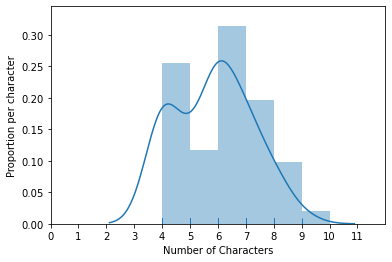

In [7]:
sns.distplot(students['name'].str.len(),
             rug=True,
             bins=np.arange(12),
             axlabel="Number of Characters")
plt.xlim(0, 12)
plt.xticks(np.arange(12))
plt.ylabel('Proportion per character');

## What's in a Name?

In [8]:
students['name'][0]

'samuel'

In [9]:
babynames = pd.read_csv('babynames.csv')
babynames

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


https://www.ssa.gov/oact/babynames/background.html

> All names are from Social Security card applications for births that occurred in the United States after 1879. Note  that many people born before 1937 never applied for a Social Security card, so their names are not included in our data. For others who did apply, our records may not show the place of birth, and again their names are not included in our data.
> 
> All data are from a 100% sample of our records on Social Security card applications as of March 2019.

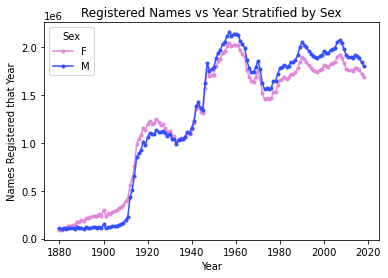

In [10]:
pivot_year_name_count = pd.pivot_table(
    babynames, index='Year', columns='Sex',
    values='Count', aggfunc=np.sum)

pink_blue = ["#E188DB", "#334FFF"]
with sns.color_palette(sns.color_palette(pink_blue)):
    pivot_year_name_count.plot(marker=".")
    plt.title("Registered Names vs Year Stratified by Sex")
    plt.ylabel('Names Registered that Year')

In [11]:
babynames['Name'] = babynames['Name'].str.lower()
babynames

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880
...,...,...,...,...
1957041,zylas,M,5,2018
1957042,zyran,M,5,2018
1957043,zyrie,M,5,2018
1957044,zyron,M,5,2018


In [12]:
sex_counts = pd.pivot_table(babynames, index='Name', columns='Sex', values='Count',
                            aggfunc='sum', fill_value=0., margins=True)
sex_counts

Sex,F,M,All
Name,,,
aaban,0,114,114
aabha,35,0,35
aabid,0,16,16
aabidah,5,0,5
aabir,0,10,10
...,...,...,...
zyvon,0,7,7
zyyanna,6,0,6
zyyon,0,6,6


In [13]:
prop_female = sex_counts['F'] / sex_counts['All']
sex_counts['prop_female'] = prop_female
sex_counts

Sex,F,M,All,prop_female
Name,,,,
aaban,0,114,114,0.000000
aabha,35,0,35,1.000000
aabid,0,16,16,0.000000
aabidah,5,0,5,1.000000
aabir,0,10,10,0.000000
...,...,...,...,...
zyvon,0,7,7,0.000000
zyyanna,6,0,6,1.000000
zyyon,0,6,6,0.000000


In [14]:
def sex_from_name(name):
    if name in sex_counts.index:
        prop = sex_counts.loc[name, 'prop_female']
        return 'F' if prop > 0.5 else 'M'
    else:
        return 'Name not in dataset'

sex_from_name('sam')

'M'

In [15]:
interact(sex_from_name, name='sam');

interactive(children=(Text(value='sam', description='name'), Output()), _dom_classes=('widget-interact',))

In [16]:
students['predicted_sex'] = students['name'].apply(sex_from_name)
students

,timestamp,name,sex,age,predicted_sex
0,1/25/2020 21:09:45,samuel,M,24.0,M
1,1/26/2020 10:16:54,matt,M,23.0,M
2,1/29/2020 12:07:44,joshua,M,23.0,M
3,1/29/2020 12:07:46,lauryn,F,20.0,F
4,1/29/2020 12:07:48,alexis,F,20.0,F
5,1/29/2020 12:07:49,adrian,M,23.0,M
6,1/29/2020 12:07:49,jess,F,21.0,M
7,1/29/2020 12:07:51,shannon,F,22.0,F
8,1/29/2020 12:07:52,cole,M,22.0,M
9,1/29/2020 12:07:54,krystyna,F,20.0,F


In [17]:
students['predicted_sex'].value_counts().to_frame().sort_index()

,predicted_sex
F,15
M,28
Name not in dataset,8


In [18]:
def avg_year(group):
    return np.average(group['Year'], weights=group['Count'])

avg_years = (
    babynames
    .groupby('Name')
    .apply(avg_year)
    .rename('avg_year')
    .to_frame()
)
avg_years

,avg_year
Name,
aaban,2013.333333
aabha,2013.714286
aabid,2012.687500
aabidah,2018.000000
aabir,2017.000000
...,...
zyvion,2009.000000
zyvon,2015.000000
zyyanna,2010.000000


In [19]:
def year_from_name(name):
    return (avg_years.loc[name, 'avg_year']
            if name in avg_years.index
            else None)

# Generate input box for you to try some names out:
interact(year_from_name, name='fernando');

interactive(children=(Text(value='fernando', description='name'), Output()), _dom_classes=('widget-interact',)…

In [20]:
students['predicted_year'] = students['name'].apply(year_from_name)
students.head()

,timestamp,name,sex,age,predicted_sex,predicted_year
0,1/25/2020 21:09:45,samuel,M,24.0,M,1975.832309
1,1/26/2020 10:16:54,matt,M,23.0,M,1962.108441
2,1/29/2020 12:07:44,joshua,M,23.0,M,1991.921298
3,1/29/2020 12:07:46,lauryn,F,20.0,F,2003.159797
4,1/29/2020 12:07:48,alexis,F,20.0,F,1999.097057


/Users/yueyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


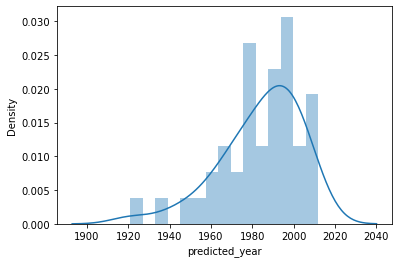

In [21]:
sns.distplot(students['predicted_year'].dropna(), bins=15);

In [22]:
students['predicted_year'].mean()

1983.8670243872364

## Why might our age estimate be inaccurate?

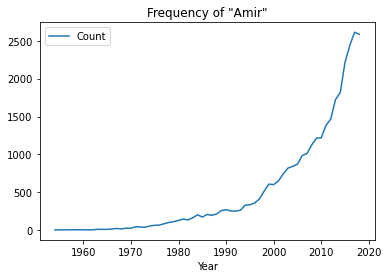

In [23]:
names = babynames.set_index('Name').sort_values('Year')
john = names.loc['amir']
john[john['Sex'] == 'M'].plot('Year', 'Count')
plt.title('Frequency of "Amir"');

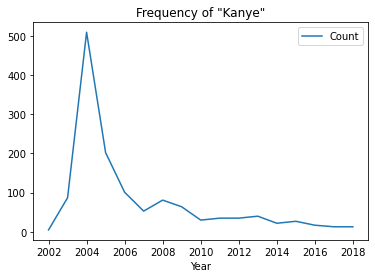

In [24]:
names = babynames.set_index('Name').sort_values('Year')
kanye = names.loc['kanye']
kanye[kanye['Sex'] == 'M'].plot('Year', 'Count')
plt.title('Frequency of "Kanye"');

## Hey Siri?

In [25]:
def plot_name(name, xlim=None, xline=None):
    names.loc[name].groupby('Year').sum().plot()
    plt.title(f'Frequency of "{name}"')
    if xlim: plt.xlim(xlim)
    if xline: plt.axvline(xline, c='red')

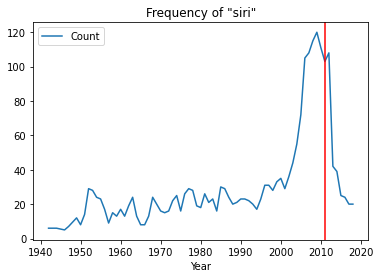

In [26]:
plot_name('siri', xline=2011)

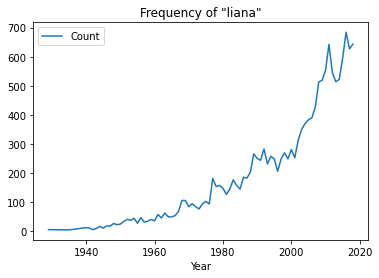

In [27]:
plot_name('liana')